<a href="https://colab.research.google.com/github/TanviKhare/GRIP/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

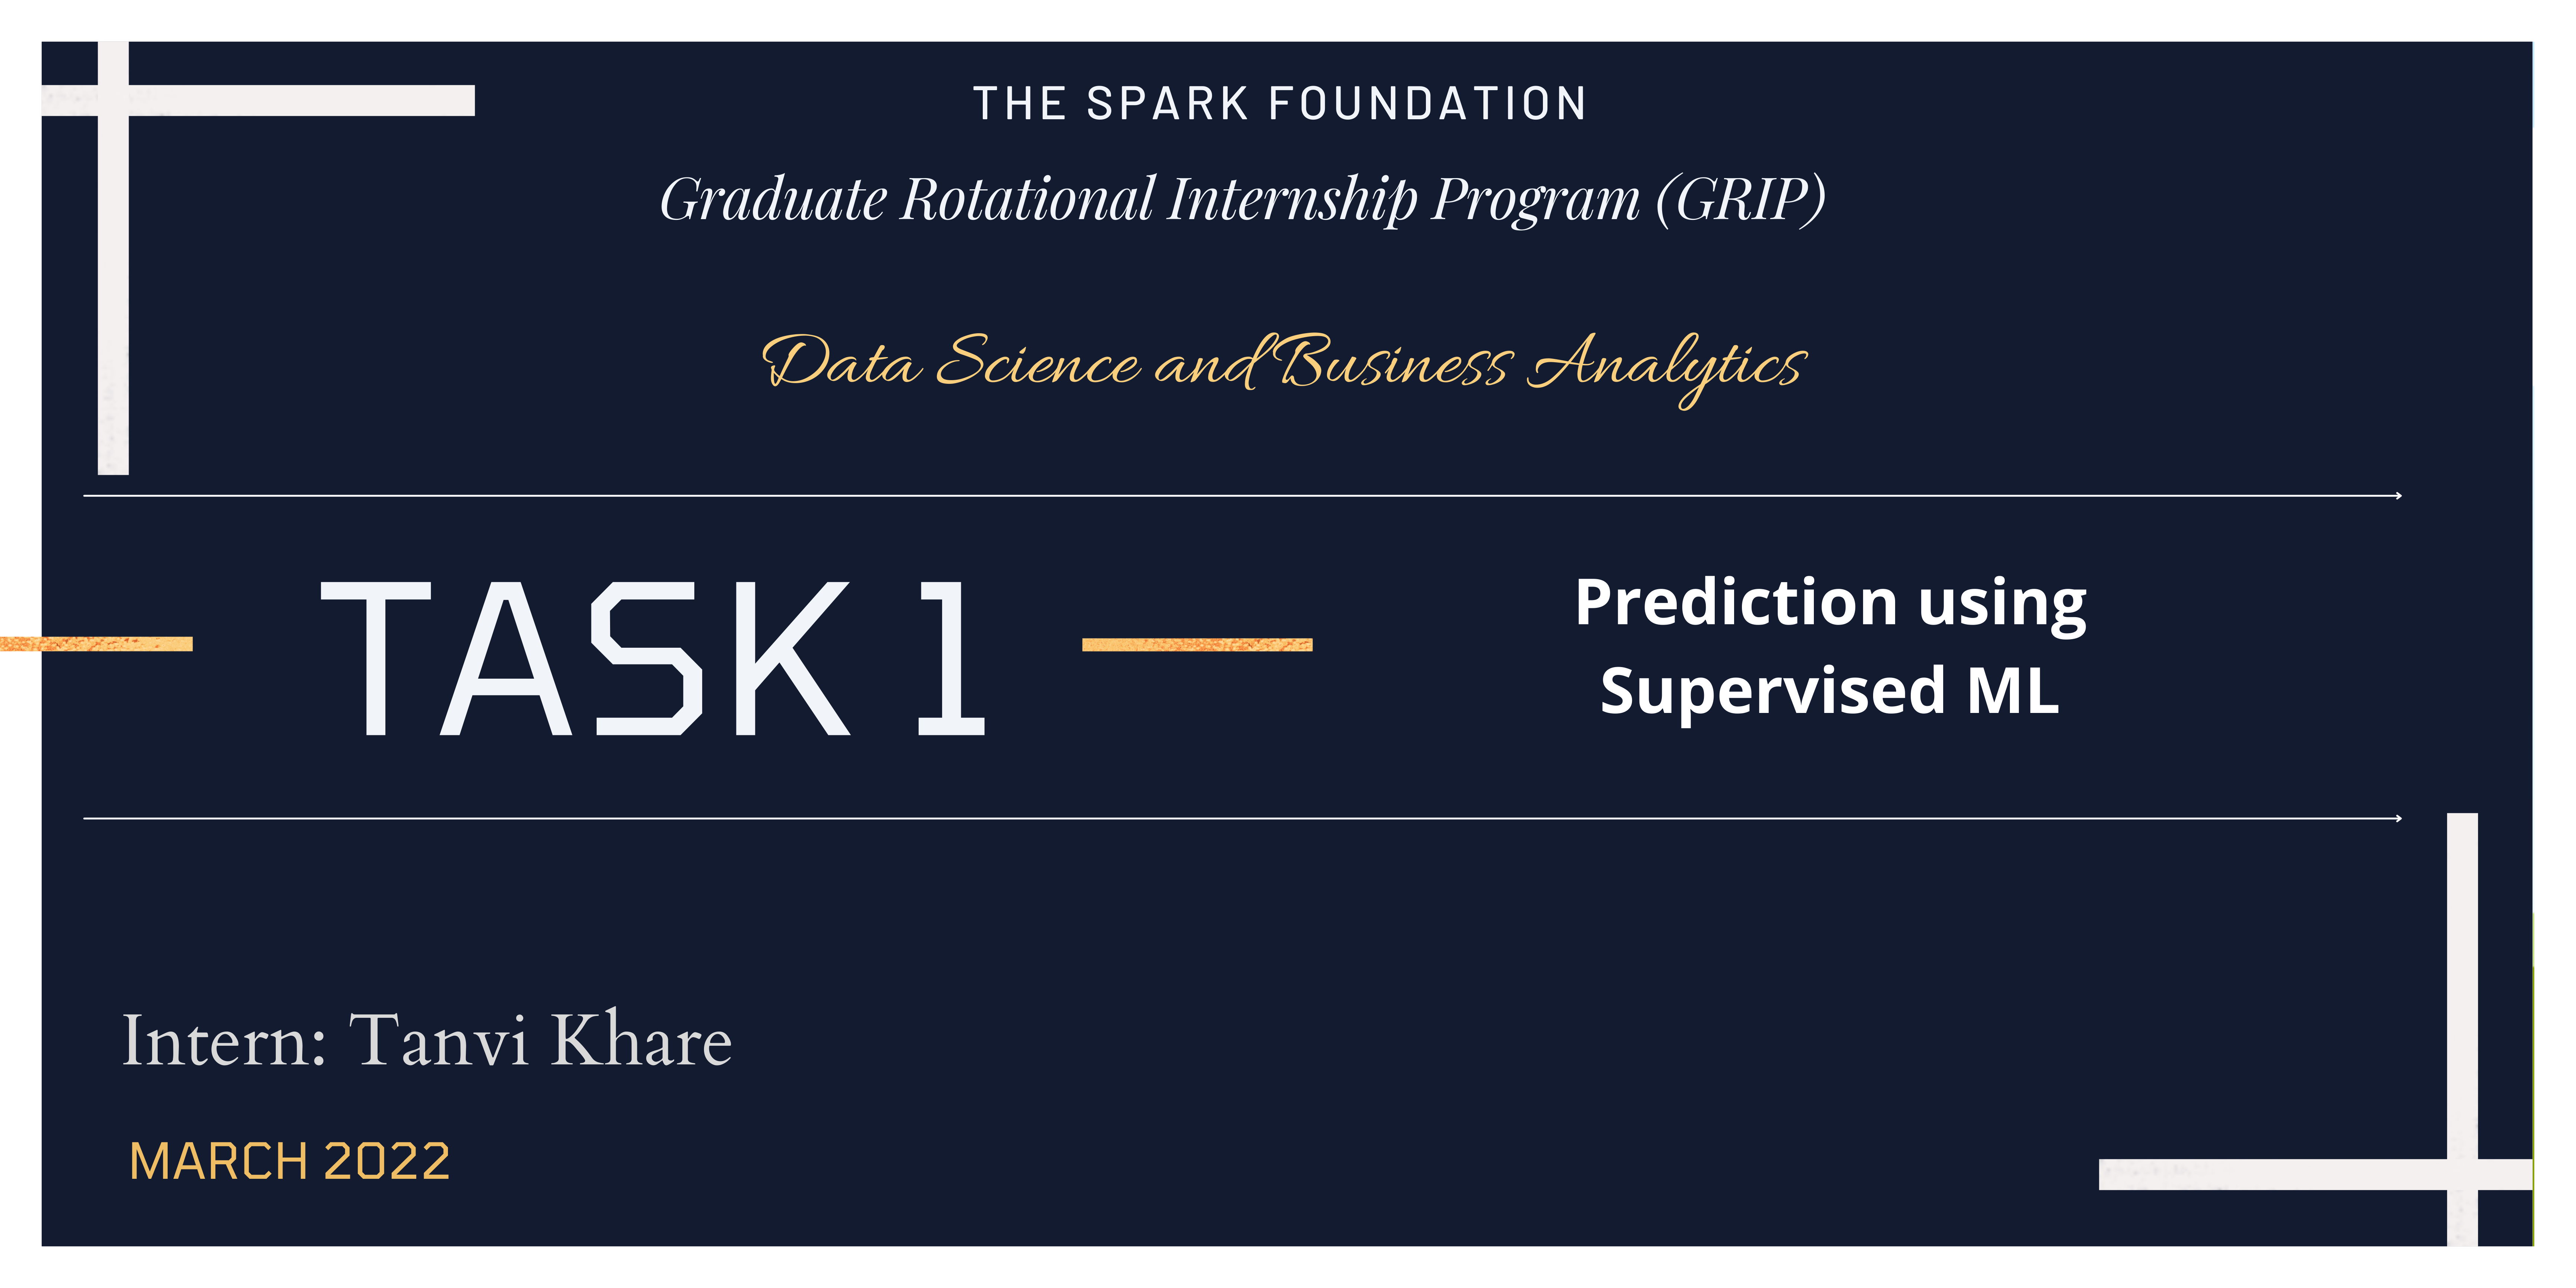

**Task 1 - Prediction Using Supervised ML**


(Predict the percentage of student based on the number of hours they study every day)

Q: What will be the predicted score if a student studies for 9.25 hrs/day?

Intern : Tanvi Khare

Batch : March 2022

**SIMPLE LINEAR REGRESSION**

In [30]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
# Reading Data

url = "http://bit.ly/w-data"
Data = pd.read_csv(url)

In [32]:
# Displaying the first 10 records

Data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [33]:
# Statistical Information

Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


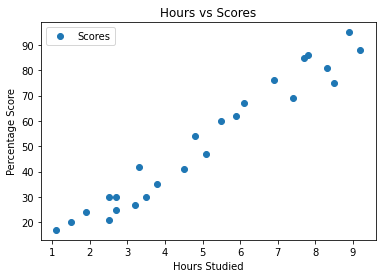

In [34]:
# Plotting the distribution of scores

Data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [35]:
# A possible linear relationship can be predicted from the graph
Data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**PREPARING THE DATA**

The next step is to divide the data into "attributes" (inputs) and "labels    (outputs)

In [ ]:
x = Data['Hours']
x.head(10)

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
5    1.5
6    9.2
7    5.5
8    8.3
9    2.7
Name: Hours, dtype: float64

In [ ]:
y = Data['Scores']
y.head(10)

0    21
1    47
2    27
3    75
4    30
5    20
6    88
7    60
8    81
9    25
Name: Scores, dtype: int64

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do
this by using Scikit-Learn's built-in train_test_split() method

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**TRAINING THE MODEL**

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [ ]:
model = LinearRegression()
model.fit(x_train.array.reshape(-1,1), y_train)

LinearRegression()

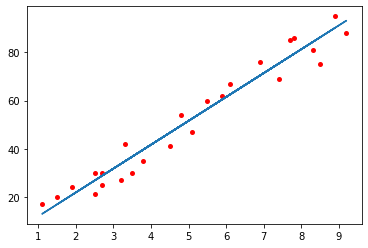

In [36]:
## Plotting the regression line (y = mx +c)
line = model.coef_*x+model.intercept_
# Plotting for the test data
plt.scatter(Data.Hours , Data.Scores , color='red', marker='.' , linewidths=2 )
plt.plot(x,line)
plt.show()

**MAKING PREDICTION**

We have trained our algorithm. Now it's time to make the predictions.

In [37]:
# Predicting the scores

y_pred = model.predict(x_test.array.reshape(-1,1))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


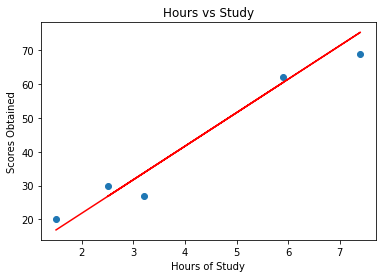

In [38]:
# Regression Graph

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')
plt.title('Hours vs Study')
plt.xlabel('Hours of Study')
plt.ylabel('Scores Obtained')
plt.show()


In [39]:
# Final Prediction

print ("Predicted Score for 9.25 hours of study : ", model.predict([[9.25]]))

Predicted Score for 9.25 hours of study :  [93.69173249]


**EVALUATE THE MODEL**

In [40]:
# Calculate Mean Absolute Error (MAE)

print('Mean Absolute Error:',
metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


CONCLUSION -
Predicted Score for 9.25 hrs/day study :  93.69%
